In [1]:
import matplotlib
import seaborn as sns
import pandas as pd
from msresist.clinical_data import volcano, preprocess_phospho, preprocess_data
from msresist.pre_processing import filter_NaNpeptides
import gseapy as gp

In [2]:
matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [3]:
from msresist.pre_processing import preprocessing
from msresist.clustering import DDMC

# Import siganling data
X = preprocessing(AXLm_ErlAF154=True, Vfilter=True, FCfilter=True, log2T=True, mc_row=True)
d = X.select_dtypes(include=['float64']).T
i = X.select_dtypes(include=['object'])

# Fit DDMC
ddmc = DDMC(i, n_components=5, SeqWeight=2, distance_method="PAM250", random_state=5).fit(d)
centers = ddmc.transform()

In [29]:
d[d.index.str.contains("CDK1")]

,WT,KO,KD,KI,Y634F,Y643F,Y698F,Y726F,Y750F,Y821F
Peptide,,,,,,,,,,
CDK1 Y15-p,-1.647209,1.03722,-0.070529,0.666905,-0.524217,1.231239,0.16731,-0.664802,-0.172729,-0.023189


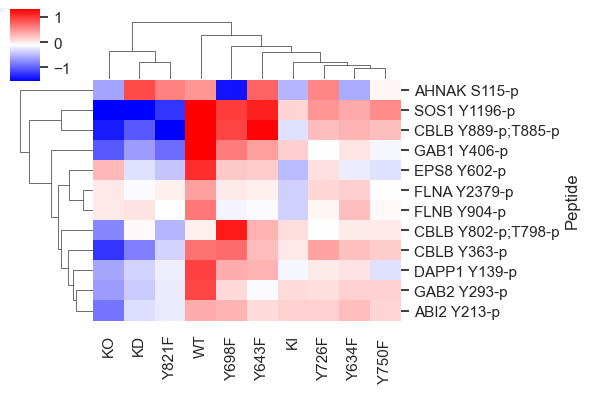

In [25]:
d = X.set_index(["Gene", "Position"]).select_dtypes(include=[float]).reset_index()
d.insert(0, "Peptide", [g + " " + p for g, p in list(zip(list(d["Gene"]), list(d["Position"])))])
d = d.drop(["Gene", "Position"], axis=1).set_index("Peptide")
d.columns = ["WT", "KO", "KD", "KI", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F ", "Y821F"]
ad = d.loc[["GAB1 Y406-p", "GAB2 Y293-p", "EPS8 Y602-p", "SOS1 Y1196-p", "DAPP1 Y139-p", "CBLB Y363-p", "CBLB Y802-p;T798-p", "CBLB Y889-p;T885-p", "FLNA Y2379-p", "FLNB Y904-p", "AHNAK S115-p", "ABI2 Y213-p", "CDK1 Y15-p", "YES1 S195-p"]]
sns.clustermap(ad, robust=True, cmap="bwr", figsize=(6, 4))

import matplotlib.pyplot as plt
plt.savefig("adapters.svg")

In [11]:
sns.clustermap()
# g = sns.clustermap(data, method="centroid", cmap="bwr", robust=robust, vmax=lim, vmin=-lim, figsize=figsize, yticklabels=yticklabels, xticklabels=xticklabels)

'SOS1;AXL;MAPK1;MAPK3;GAB1'

In [3]:
phos = filter_NaNpeptides(pd.read_csv("msresist/data/MS/CPTAC/CPTAC-preprocessedMotfis.csv").iloc[:, 1:], tmt=2)
prot = pd.read_csv("msresist/data/MS/CPTAC/CPTAC_LUAD_Protein.csv").drop_duplicates(subset="geneSymbol").set_index("geneSymbol").select_dtypes(include=float).iloc[:, 4:].reset_index()
rna = pd.read_csv("msresist/data/MS/CPTAC/CPTAC_LUAD_RNAseq.csv").drop_duplicates(subset="geneSymbol")
_, phosR_tumor, _ = preprocess_phospho(phos)
protR, protR_tumor, _ = preprocess_data(prot)
_, rnaR_tumor, _ = preprocess_data(rna)

/tmp/ipykernel_1989953/2324820676.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  prot = pd.read_csv("msresist/data/MS/CPTAC/CPTAC_LUAD_Protein.csv").drop_duplicates(subset="geneSymbol").set_index("geneSymbol").select_dtypes(include=float).iloc[:, 4:].reset_index()


In [4]:
phos = phosR_tumor
prot = protR_tumor
rna = rnaR_tumor

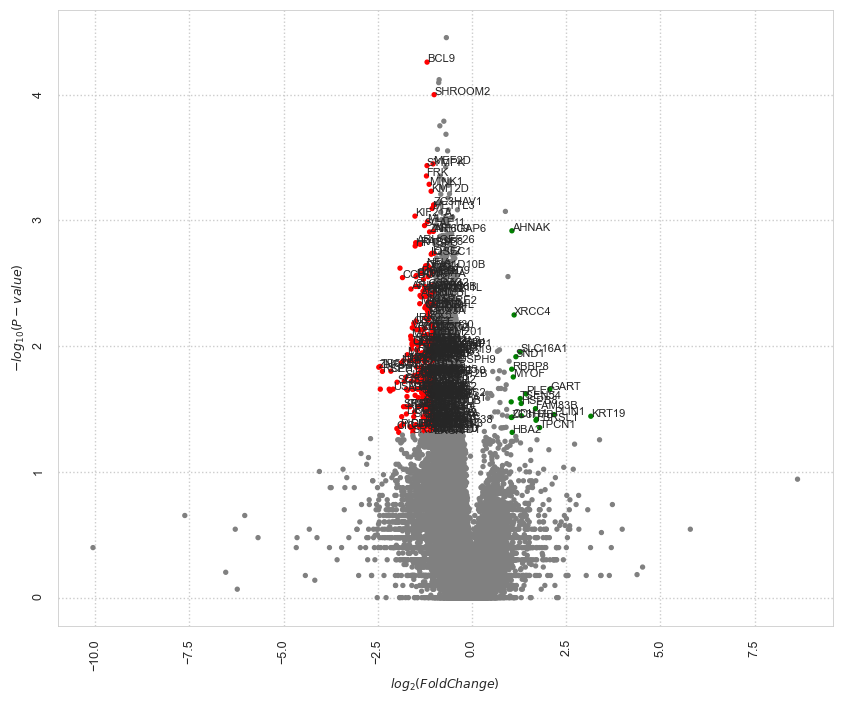

In [5]:
enr = volcano(phos, prot, gene_label="Gene", multiple_testing=False, export=True)

In [16]:
enr[enr["Protein"] == "COPG2"]

,Protein,Position,Prot_Pos,logFC,p-values


In [10]:
enr[(enr["logFC"] > 0) & (enr["p-values"] < 0.05)]

,Protein,Position,Prot_Pos,logFC,p-values
13103,SLCO2B1,S320-p,SLCO2B1-S320-p,0.886982,0.000848
8833,AHNAK,S216-p,AHNAK-S216-p,1.059595,0.001209
15740,CAV2,Y19-p;S20-p,CAV2-Y19-p;S20-p,0.954926,0.002797
3735,XRCC4,S260-p,XRCC4-S260-p,1.118190,0.005647
4717,CLIC1,T155-p,CLIC1-T155-p,0.729415,0.010694
27284,PPP6R1,S529-p,PPP6R1-S529-p,0.676056,0.010989
11169,SLC16A1,S467-p,SLC16A1-S467-p,1.278258,0.011146
18940,SND1,Y109-p,SND1-Y109-p,1.165105,0.012139
10363,NUP93,S614-p,NUP93-S614-p,0.985806,0.013187
26237,RBBP8,S539-p,RBBP8-S539-p,1.054935,0.015247


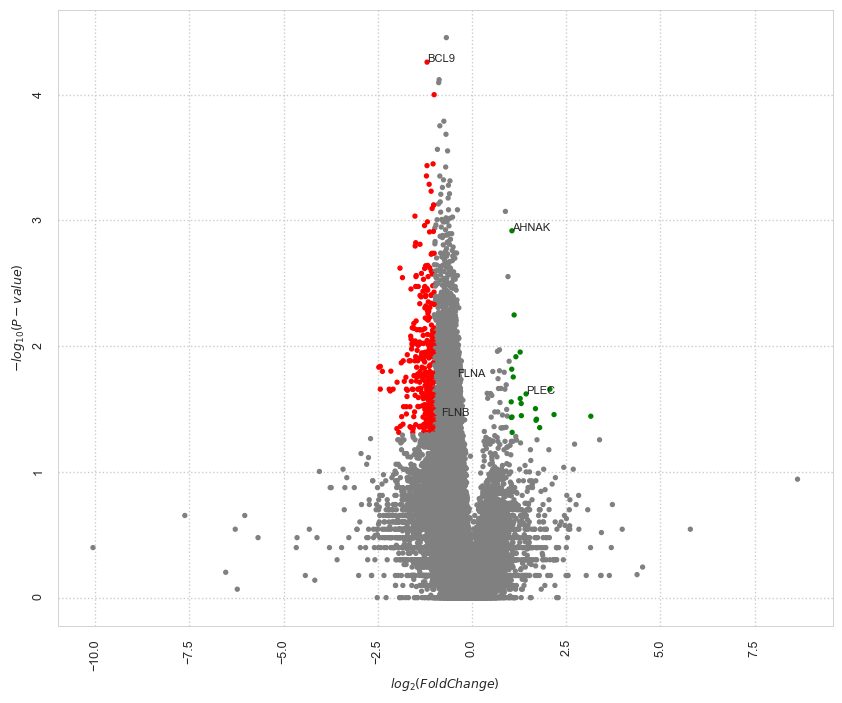

In [5]:
enr = volcano(phos, prot, gene_label="Gene", multiple_testing=False, export=False, genenames=("BCL9", "AHNAK", "FLNA", "FLNB", "PLEC"))

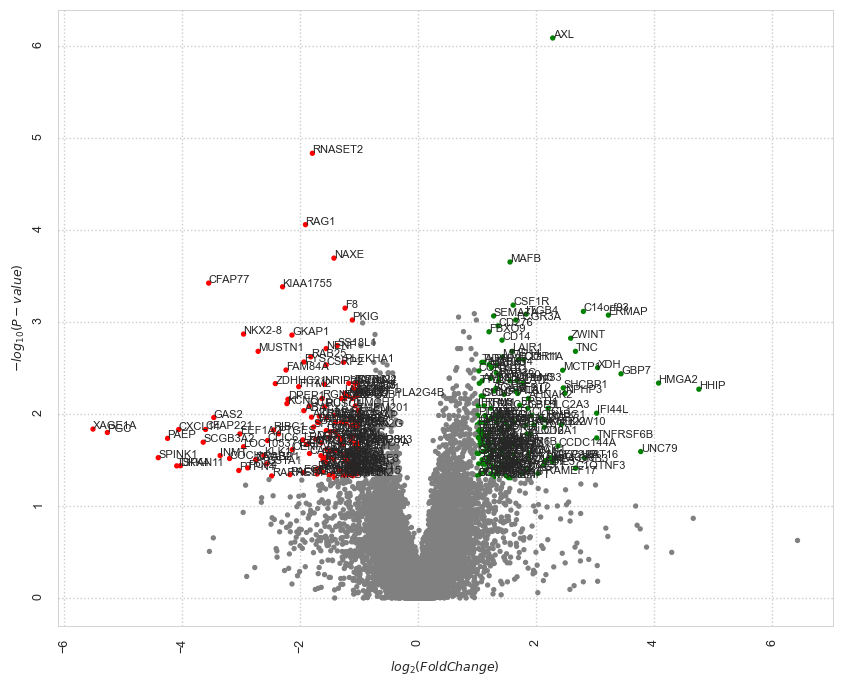

In [6]:
enr = volcano(prot, prot, gene_label="geneSymbol", multiple_testing=False, export=True)